In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

Combaining 12 months of data into single file

In [4]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame() #empty dataframe 

for file in files:
    current_data = pd.read_csv(path+"/"+file) # read one file at time
    all_months_data = pd.concat([all_months_data, current_data])  #concating current file data to new created df
    
all_months_data.to_csv("all_data.csv", index=False) # saving new df to new csv file

Reading new combained csv file

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Droping all NaN value rows

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


 Get rid of text in order date column

In [12]:
all_data[all_data['Order Date'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
# selecting columns with coorect date format
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Correcting Dtype of columns

In [15]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float', errors = 'raise')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [16]:
df = all_data.copy()

### Augmented data with additional columns

Add Month columns

In [17]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

# alternative if it is not in datetime format
# all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = all_data['Month'].astype('int32')
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


Add Sales columns

In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


Add city Column

In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")
    # first spliting address into list by comma as seprator
    # then taking second element of list as it is city name and 
    # thired element as stste name but spliting state again for 
    # considering only first two letter or first word 

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
s='917 1st St, Dallas, TX 75001'
s.split(",")

['917 1st St', ' Dallas', ' TX 75001']

### Q1 what was best months for sale? how much was earned that month

In [22]:
maxsale = all_data.groupby('Month').sum()
maxsale = maxsale.round(5)
maxsale

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [23]:
maxsale.sort_values('Sales',ascending = False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


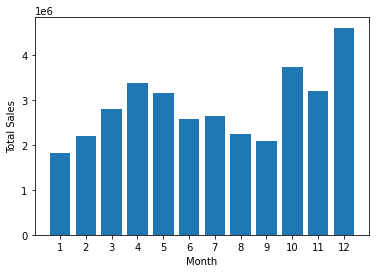

In [24]:
# ploting 
months = range(1,13)
plt.bar(months,maxsale['Sales'])
plt.xticks(months)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

###### So December has max sale

### Q 2: What city sold the most product?

In [25]:
soldBycity = all_data.groupby(['City']).sum()
soldBycity = soldBycity.round(5)
soldBycity

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [26]:
soldBycity.sort_values('Sales',ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


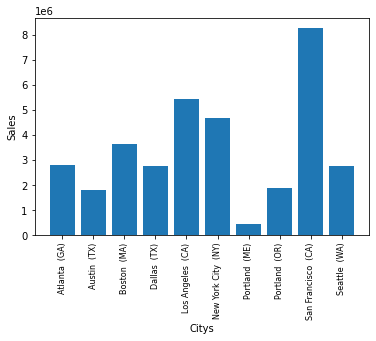

In [27]:
city = [city for city, df in all_data.groupby(['City'])]
# above line is to get all cities in same order as we get them by group by 
# by using unique we get in mismatch order
plt.bar(city,soldBycity['Sales'])
plt.ylabel('Sales')
plt.xlabel('Citys')
plt.xticks(city, rotation='vertical', size=8)
plt.show()

###### from above plot we see that SF sold more items 

### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [28]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [29]:
best_time = all_data.groupby(['Hour']).count()
best_time

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [30]:
best_time.sort_values('Count',ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921


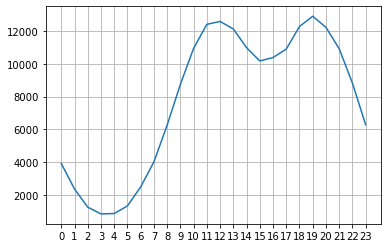

In [31]:
hr = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(hr, best_time['Count'])
plt.xticks(hr)
plt.grid()
plt.show()

### Q4: What products are most often sold together?

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [33]:
# checking if product is placed in same order or differnt
# same order if so in single order

In [34]:
# date with same order id 
duplicate_orderID = all_data[all_data['Order ID'].duplicated(keep=False)]
#keep = false because we are keeping all duplicates value 

duplicate_orderID

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,1
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,1
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,1
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,1


In [35]:
# combaing data with same order id
duplicate_orderID['Grouped'] = duplicate_orderID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [36]:
duplicate_orderID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [37]:
duplicate_orderID['Grouped'].head()

3                         Google Phone,Wired Headphones
4                         Google Phone,Wired Headphones
18                    Google Phone,USB-C Charging Cable
19                    Google Phone,USB-C Charging Cable
30    Bose SoundSport Headphones,Bose SoundSport Hea...
Name: Grouped, dtype: object

In [38]:
# droping dulicate rows and considering only 'Order ID', 'Grouped' col
unique_orderID = duplicate_orderID[['Order ID', 'Grouped']].drop_duplicates()

In [39]:
unique_orderID

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [40]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in unique_orderID['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common():
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

### Q5: What product sold the most? Why do you think it sold the most?

In [41]:
quantity = all_data.groupby('Product').sum()['Quantity Ordered']
quantity.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

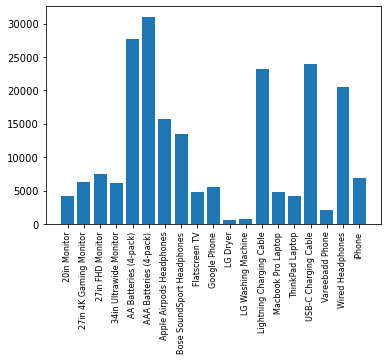

In [42]:
products = [pair for pair, df in (all_data.groupby('Product'))]
plt.bar(products, quantity)
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [43]:
prices = all_data.groupby('Product').mean()['Price Each']
prices.sort_values(ascending=False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

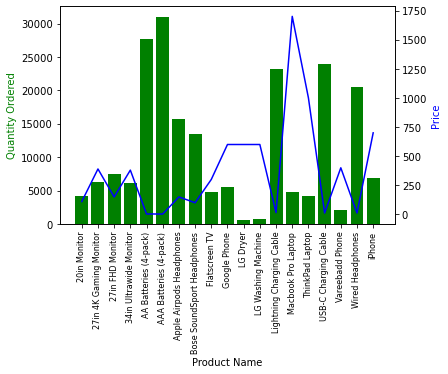

In [44]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

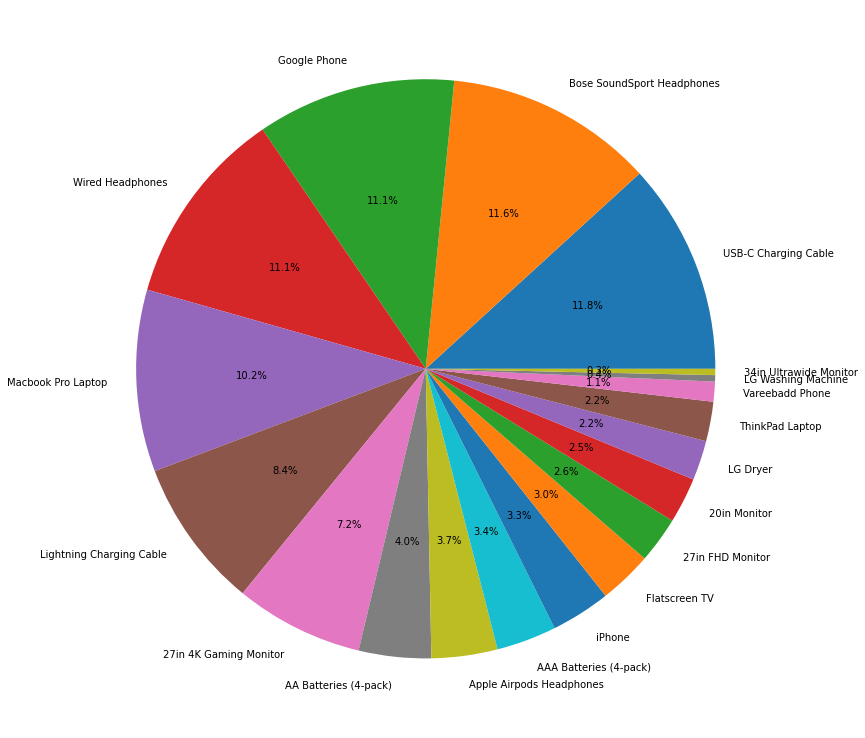

In [45]:
#pie chart 
plt.figure(figsize=(12,12))
plt.pie(list(all_data['Product'].value_counts()),labels = list(all_data['Product'].unique()),autopct='%0.1f%%')
plt.tight_layout()
plt.show()

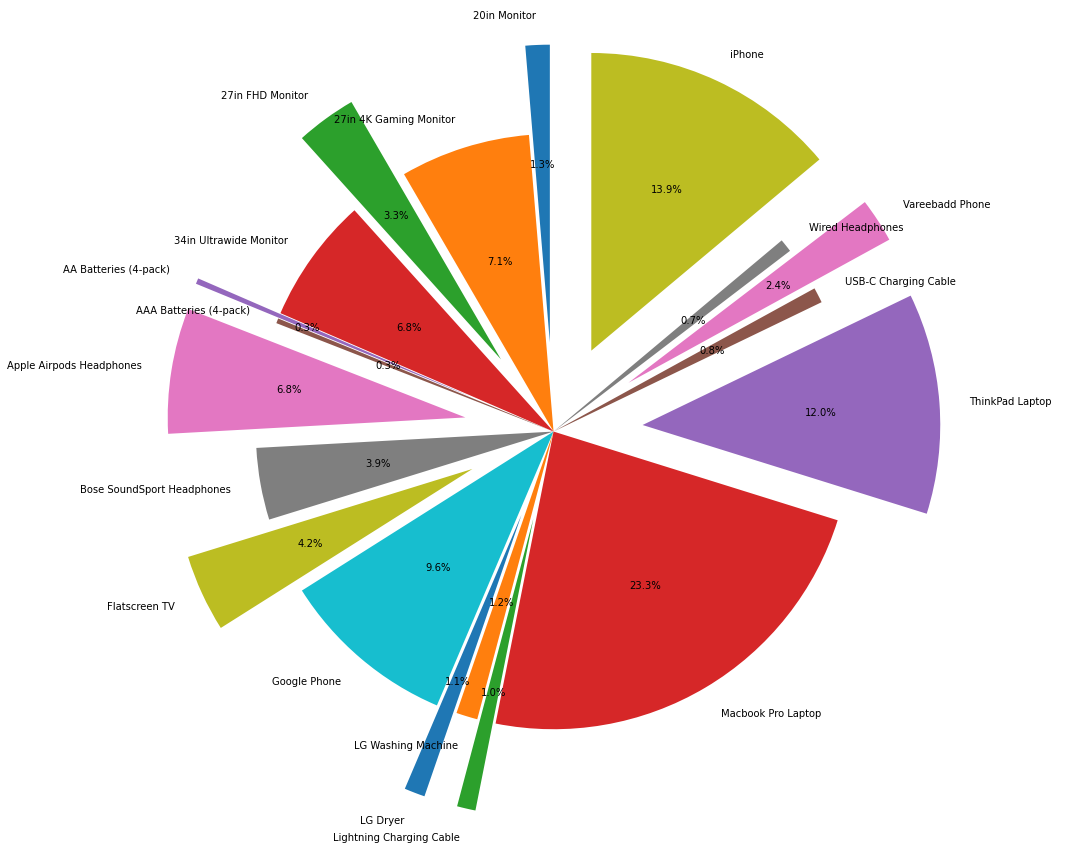

In [46]:
#pie chart 
products = [pair for pair, df in (all_data.groupby('Product'))]
sale = all_data.groupby('Product').sum()['Sales']

my_explode = []

for i in range(len(products)):
    if i%2 == 0:
        my_explode.append(0.3)
    else:
        my_explode.append(0)
    
plt.figure(figsize=(15,12))
plt.pie(sale, labels=products, autopct='%1.1f%%', startangle=90,explode=my_explode)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 1. which day have most ordered items and what was top 3 product sold on that day.

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [48]:
all_data['Day'] = all_data['Order Date'].dt.day_name()


In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1,Tuesday


In [50]:
high_sale_day = all_data.groupby('Day').sum()
high_sale_day = high_sale_day.round(5)
high_sale_day

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Day,,,,,,,
Friday,29448,4830795.59,184699,4855938.38,379231,776725,26247
Monday,29899,4850763.70,190462,4883326.72,382210,779741,26547
Saturday,29769,4873105.48,185836,4904357.01,382019,779294,26492
Sunday,29778,4903226.77,188819,4932169.66,384250,783205,26551
Thursday,29662,4810040.26,185521,4839465.16,380961,783278,26461
Tuesday,30724,5061153.03,193238,5087956.78,390675,803163,27175
Wednesday,29799,4960045.85,184072,4988822.26,380808,776653,26477


In [51]:
high_sale_day.sort_values('Quantity Ordered',ascending = False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Day,,,,,,,
Tuesday,30724,5061153.03,193238,5087956.78,390675,803163,27175
Monday,29899,4850763.70,190462,4883326.72,382210,779741,26547
Wednesday,29799,4960045.85,184072,4988822.26,380808,776653,26477
Sunday,29778,4903226.77,188819,4932169.66,384250,783205,26551
Saturday,29769,4873105.48,185836,4904357.01,382019,779294,26492
Thursday,29662,4810040.26,185521,4839465.16,380961,783278,26461
Friday,29448,4830795.59,184699,4855938.38,379231,776725,26247


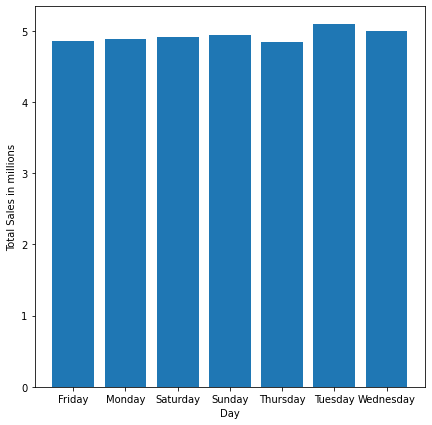

In [136]:
# ploting 
plt.figure(figsize=(7,7))
day = [day for day, df in all_data.groupby(['Day']) ]
plt.bar(day,high_sale_day['Sales']/1000000)
plt.xticks(day)
plt.ylabel('Total Sales in millions')
plt.xlabel('Day')
plt.show()

In [53]:
Tuesday_sale = all_data[all_data['Day'] == 'Tuesday']

In [145]:
sale = Tuesday_sale.groupby('Product').sum()['Sales']
top3 = sale.sort_values(ascending=False)[0:3]

In [146]:
top3

Product
Macbook Pro Laptop    1230800.00
iPhone                 704200.00
ThinkPad Laptop        598994.01
Name: Sales, dtype: float64

## 2-Which month have most sale for iPhone

In [56]:
iphone_data = all_data[all_data.Product == 'iPhone'].groupby("Month").sum()['Sales']

In [57]:
iphone_data.sort_values(ascending=False)

Month
12    634200.0
10    501200.0
4     485100.0
11    465500.0
5     448000.0
3     376600.0
6     373100.0
7     351400.0
8     307300.0
2     307300.0
9     277900.0
1     266700.0
Name: Sales, dtype: float64

In [134]:
iphone_data[iphone_data == iphone_data.max()]

Month
12    634200.0
Name: Sales, dtype: float64

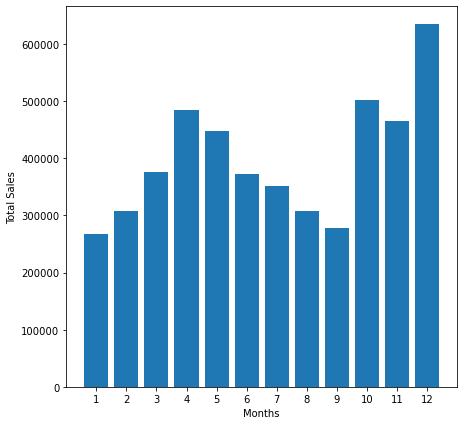

In [119]:
# ploting 
plt.figure(figsize=(7,7))
months = range(1,13)
plt.bar(months,iphone_data)
plt.xticks(months)
plt.ylabel('Total Sales')
plt.xlabel('Months')
plt.show()

## 3. Which state have most product ordered and which is top product orderd, Which product give highest sale.


In [59]:
all_data['State'] = all_data['Purchase Address'].apply(lambda x: f"{get_state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Day,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1,Friday,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1,Sunday,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,Friday,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,Friday,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1,Tuesday,CA


In [60]:
state_max_order = all_data.groupby("State").sum()['Quantity Ordered']

In [61]:
state_max_order.sort_values(ascending=False)

State
CA    83528
NY    27932
TX    27883
MA    22528
GA    16602
WA    16553
OR    11303
ME     2750
Name: Quantity Ordered, dtype: int32

In [62]:
state_max_sale = all_data.groupby("State").sum()['Sales'].round(5)
state_max_sale.sort_values(ascending=False)

State
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Sales, dtype: float64

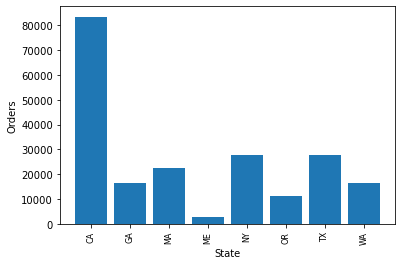

In [63]:
state = [state for state, df in all_data.groupby(['State'])]
plt.bar(state,state_max_order)
plt.ylabel('Orders')
plt.xlabel('State')
plt.xticks(state, rotation='vertical', size=8)
plt.show()

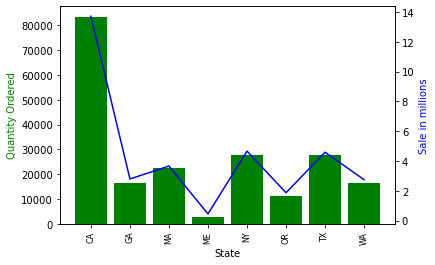

In [132]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(state, state_max_order, color='g')
ax2.plot(state, state_max_sale/1000000, color='b')

ax1.set_xlabel('State')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Sale in millions', color='b')
ax1.set_xticklabels(state, rotation='vertical', size=8)

fig.show()

## 4. What brand of products have higher purchase value?

In [65]:
price = all_data[['Product','Price Each']].sort_values('Price Each',ascending=False)
price

,Product,Price Each
160130,Macbook Pro Laptop,1700.00
30968,Macbook Pro Laptop,1700.00
140070,Macbook Pro Laptop,1700.00
183797,Macbook Pro Laptop,1700.00
107437,Macbook Pro Laptop,1700.00
...,...,...
66561,AAA Batteries (4-pack),2.99
157818,AAA Batteries (4-pack),2.99
66599,AAA Batteries (4-pack),2.99
157813,AAA Batteries (4-pack),2.99


In [66]:
price.drop_duplicates(inplace=True)
price

,Product,Price Each
160130,Macbook Pro Laptop,1700.00
149015,ThinkPad Laptop,999.99
62626,iPhone,700.00
89850,Google Phone,600.00
6866,LG Washing Machine,600.00
71375,LG Dryer,600.00
131624,Vareebadd Phone,400.00
171586,27in 4K Gaming Monitor,389.99
91567,34in Ultrawide Monitor,379.99
41876,Flatscreen TV,300.00


## 5. What is the best time(s) of the year to give deals/discounts on products? and on what products?

## 6. What product(s) is/are sold the most throught out the year?

In [174]:
test = all_data.groupby(['Month','Product']).sum()['Sales'].sort_values(ascending=False)
a = test.groupby(['Month','Product']).max().reset_index()
a.groupby(['Month']).max()

In [185]:
a = test.groupby(['Month','Product']).max().reset_index()

In [181]:
a = test.groupby(['Month','Product']).max()

In [186]:
a

,Month,Product,Sales
0,1,20in Monitor,23977.82
1,1,27in 4K Gaming Monitor,122066.87
2,1,27in FHD Monitor,63295.78
3,1,34in Ultrawide Monitor,119316.86
4,1,AA Batteries (4-pack),5468.16
...,...,...,...
223,12,ThinkPad Laptop,538994.61
224,12,USB-C Charging Cable,38837.50
225,12,Vareebadd Phone,113600.00
226,12,Wired Headphones,32960.51


In [188]:
a.groupby(['Month']).max()

,Product,Sales
Month,,
1,iPhone,399500.0
2,iPhone,469200.0
3,iPhone,644300.0
4,iPhone,771800.0
5,iPhone,790500.0
6,iPhone,605200.0
7,iPhone,625600.0
8,iPhone,508300.0
9,iPhone,489600.0


In [144]:
test = all_data.groupby('Product').sum()['Sales']
test[test == test.max()]

Product
Macbook Pro Laptop    8037600.0
Name: Sales, dtype: float64

## 7. What month of the year is the best to sell laptops?

In [70]:
laptop_sale = all_data[all_data.Product.str.contains('Laptop')]

In [71]:
laptop_sale_total = laptop_sale.groupby('Month').sum()['Sales']

In [72]:
laptop_sale_total.sort_values(ascending=False)

Month
12    1632094.61
10    1353495.39
4     1161796.10
5     1161496.29
11    1121996.26
3      989296.55
7      944596.81
6      919196.86
8      782297.26
2      744197.25
9      738597.51
1      618497.81
Name: Sales, dtype: float64

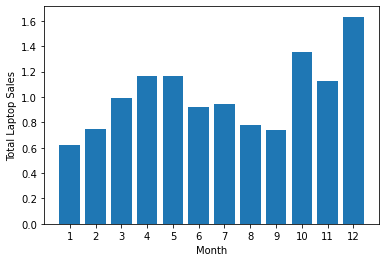

In [130]:
# ploting 
months = range(1,13)
plt.bar(months,laptop_sale_total/1000000)
plt.xticks(months)
plt.ylabel('Total Laptop Sales in Millions')
plt.xlabel('Month')
plt.show()

## 8. What are the other products sold with headphones?

In [74]:
df = unique_orderID[unique_orderID.Grouped.str.contains('Headphones')]
df = df.drop('Order ID',axis=1)
df

,Grouped
3,"Google Phone,Wired Headphones"
30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
129,"Apple Airpods Headphones,ThinkPad Laptop"
138,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
250,"Google Phone,Bose SoundSport Headphones,Wired ..."
...,...
186597,"iPhone,Wired Headphones"
186611,"iPhone,Wired Headphones"
186761,"iPhone,Wired Headphones"
186781,"Apple Airpods Headphones,Apple Airpods Headphones"


In [75]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(5):
    print(key, value)

('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160


## 9. What are the most  and least sold products in Portland(ME) and San Francisco(CA)?

In [191]:
data = all_data[(all_data.City == 'San Francisco  (CA)') | (all_data.City == 'Portland  (ME)')]

In [192]:
data.groupby('Product').sum()['Sales'].sort_values(ascending=False)

Product
Macbook Pro Laptop            2038300.00
iPhone                        1218000.00
ThinkPad Laptop               1015989.84
Google Phone                   861000.00
27in 4K Gaming Monitor         602534.55
Apple Airpods Headphones       594900.00
34in Ultrawide Monitor         578344.78
Flatscreen TV                  364800.00
Bose SoundSport Headphones     349665.03
27in FHD Monitor               289180.72
Vareebadd Phone                204400.00
20in Monitor                   116479.41
LG Washing Machine             114600.00
LG Dryer                        89400.00
Lightning Charging Cable        87098.70
USB-C Charging Cable            74496.30
Wired Headphones                62887.55
AA Batteries (4-pack)           26664.96
AAA Batteries (4-pack)          23220.34
Name: Sales, dtype: float64

## 10. Calculate the Total Sales per quarter i.e. for 3 months?

In [78]:
df1 = all_data.copy()

In [79]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Day,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1,Friday,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1,Sunday,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,Friday,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,Friday,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1,Tuesday,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,1,Tuesday,CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,1,Sunday,CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,1,Monday,CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,1,Thursday,CA


In [80]:
df1['quarter'] = df1['Order Date'].dt.to_period('Q')

In [115]:
df1['quarter_custom'] = df1['Order Date'].dt.to_period('Q').dt.strftime('%q')

In [116]:
quter_sale = df1.groupby('quarter_custom').sum()['Sales'].round(5)

In [117]:
quter_sale

quarter_custom
1     6831379.53
2     9121079.25
3     6989803.77
4    11549773.42
Name: Sales, dtype: float64

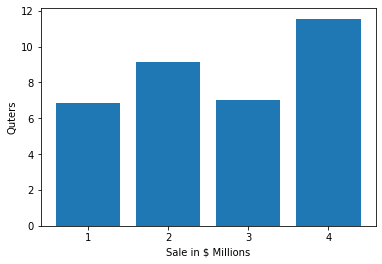

In [128]:
quters = [pair for pair, df in (df1.groupby('quarter_custom'))]
sale = df1.groupby('quarter_custom').sum()['Sales']


plt.bar(quters,sale/1000000)
plt.xticks(quters)
plt.ylabel('Quters')
plt.xlabel('Sale in $ Millions')
plt.show()

In [ ]:
max_sale = 

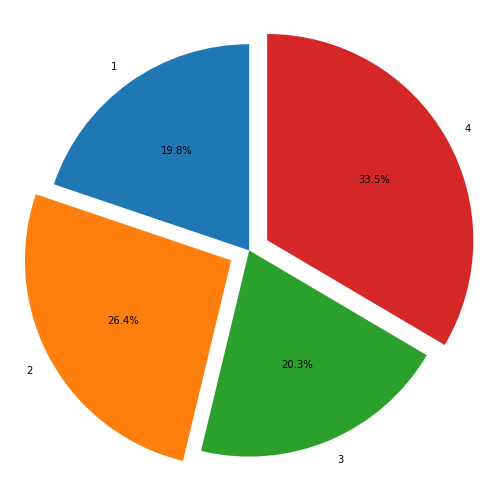

In [193]:
#pie chart 
quters = [pair for pair, df in (df1.groupby('quarter_custom'))]
sale = df1.groupby('quarter_custom').sum()['Sales']

my_explode = []

for i in range(len(quters)):
    if i%2 == 0:
        my_explode.append(0)
    else:
        my_explode.append(0.1)
    
plt.figure(figsize=(7,7))
plt.pie(sale, labels=quters, autopct='%1.1f%%', startangle=90,explode=my_explode)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 11. Which product was sold most in San Francisco?

In [83]:
all_data.City.unique()

array(['Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)',
       'San Francisco  (CA)', 'Seattle  (WA)', 'Atlanta  (GA)',
       'New York City  (NY)', 'Portland  (OR)', 'Austin  (TX)',
       'Portland  (ME)'], dtype=object)

In [84]:
SF_data = all_data[all_data.City == 'San Francisco  (CA)'].groupby('Product').sum()['Sales']

In [85]:
SF_data.sort_values(ascending=False)[0:1]

Product
Macbook Pro Laptop    1931200.0
Name: Sales, dtype: float64

## 12. What are the Least 3 products sold in Texas?

In [86]:
TA_data = all_data[all_data.State == 'TX']

In [87]:
TA_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Day,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1,Friday,TX
13,176569,27in 4K Gaming Monitor,1,389.99,2019-04-16 19:23:00,"657 Hill St, Dallas, TX 75001",4,389.99,Dallas (TX),19,23,1,Tuesday,TX
14,176570,AA Batteries (4-pack),1,3.84,2019-04-22 15:09:00,"186 12th St, Dallas, TX 75001",4,3.84,Dallas (TX),15,9,1,Monday,TX
22,176577,Apple Airpods Headphones,1,150.00,2019-04-04 19:25:00,"260 Spruce St, Dallas, TX 75001",4,150.00,Dallas (TX),19,25,1,Thursday,TX
38,176591,Apple Airpods Headphones,1,150.00,2019-04-21 07:21:00,"600 Maple St, Austin, TX 73301",4,150.00,Austin (TX),7,21,1,Sunday,TX


In [88]:
productTX = TA_data.groupby('Product').sum()['Sales']

In [89]:
productTX.sort_values(ascending=False)

Product
Macbook Pro Laptop            1076100.00
iPhone                         627200.00
ThinkPad Laptop                554994.45
Google Phone                   441000.00
34in Ultrawide Monitor         319191.60
Apple Airpods Headphones       312150.00
27in 4K Gaming Monitor         311602.01
Flatscreen TV                  198600.00
Bose SoundSport Headphones     176982.30
27in FHD Monitor               142040.53
Vareebadd Phone                114400.00
20in Monitor                    63024.27
LG Dryer                        59400.00
Lightning Charging Cable        47406.45
LG Washing Machine              46200.00
USB-C Charging Cable            37080.85
Wired Headphones                33560.01
AA Batteries (4-pack)           14150.40
AAA Batteries (4-pack)          12474.28
Name: Sales, dtype: float64

In [90]:
productTX.sort_values(ascending=False)[-1:-4:-1]

Product
AAA Batteries (4-pack)    12474.28
AA Batteries (4-pack)     14150.40
Wired Headphones          33560.01
Name: Sales, dtype: float64

In [91]:
productTX_order = TA_data.groupby('Product').sum()['Quantity Ordered']

In [92]:
productTX_order.sort_values(ascending=False)[-1:-4:-1]

Product
LG Washing Machine     77
LG Dryer               99
Vareebadd Phone       286
Name: Quantity Ordered, dtype: int32